In [ ]:
#Importing Libraries for Data Pre-processing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [ ]:
#Testing if GPU is Active
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
#Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Loading Stock Data**

In [ ]:
# Read the CSV file into a Pandas DataFrame
database = pd.read_csv('/content/drive/MyDrive/psxdata/stocks/UBL.csv')

# Extract the date and closing price columns
dates = database['ds']
closing_prices = database['y']

# Calculate the number of data points for training and testing
number_of_data_points = len(database)
train_data_size = math.ceil(number_of_data_points * 0.8)

# Split the data into training and testing sets
train_data = pd.DataFrame(data={'Date': dates[:train_data_size], 'Close': closing_prices[:train_data_size]})
test_data = pd.DataFrame(data={'Date': dates[train_data_size:], 'Close': closing_prices[train_data_size:]})

# Print the first few rows of the training and testing data
print('Training data:')
print(train_data.head())
print(train_data.shape)

print('\nTesting data:')
print(test_data.head())
print(test_data.shape)


Training data:
         Date  Close
0  2013/01/01  83.24
1  2013/01/02  81.24
2  2013/01/03  81.81
3  2013/01/04  82.52
4  2013/01/07  82.69
(1983, 2)

Testing data:
            Date   Close
1983  2021/01/01  129.95
1984  2021/01/04  130.14
1985  2021/01/05  130.16
1986  2021/01/06  131.48
1987  2021/01/07  139.32
(495, 2)


# **Data Pre-Processing**

In [ ]:
# Selecting Open Price values for Training Data
print("OG Dataset_train, 1 Dimensional:", dataset_train.shape)

# Reshaping 1D to 2D array for Training Data
dataset_train = np.reshape(dataset_train, (-1,1))
print("New Dataset_train, 2 Dimensional:", dataset_train.shape)


# Selecting Open Price values for Testing Data
dataset_test = test_data.Close.values
print("OG Dataset_test 1 Dimensional:", dataset_test.shape)

# Reshaping 1D to 2D array for Testing Data
dataset_test = np.reshape(dataset_test, (-1,1))
print("New Dataset_test 2 Dimensional:", dataset_test.shape)

OG Dataset_train, 1 Dimensional: (1983, 1)
New Dataset_train, 2 Dimensional: (1983, 1)
OG Dataset_test 1 Dimensional: (495,)
New Dataset_test 2 Dimensional: (495, 1)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
# scaling both datasets, Normalizing values between 0 and 1
scaled_train = scaler.fit_transform(dataset_train)
scaled_test = scaler.fit_transform(dataset_test)

print("Training Dataset Normalized")
print(scaled_train[:5])
print("Normalized Training Dataset Shape:", scaled_train.shape)

print("Testing Dataset Normalized")
print(scaled_test[:5])
print("Normalized Testing Dataset Shape:", scaled_test.shape)

Training Dataset Normalized
[[0.01030184]
 [0.        ]
 [0.00293603]
 [0.00659318]
 [0.00746884]]
Normalized Training Dataset Shape: (1983, 1)
Testing Dataset Normalized
[[0.62055789]
 [0.624188  ]
 [0.62457012]
 [0.64978984]
 [0.79957967]]
Normalized Testing Dataset Shape: (495, 1)


In [ ]:
#Only to understand the below code of x_train and y_train datasets
test = []
for i in range(1, 101):
  test.append(i)
print(test)

test = np.array(test)
test = np.reshape(test, (-1, 1))
print(type(test))
print("The shape is:", test.shape)

#For training set
xs = []
ys = []
for i in range(5, len(test)):
    xs.append(test[i-5:i, 0])
    ys.append(test[i, 0])
    if i >= 99:
        print("XS Array is:", xs)
        print("YS Array is:", ys)

xs = np.array(xs)
ys = np.array(ys)


print("XS Shape is:", xs.shape)
print("YS Shape is:", ys.shape)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]
<class 'numpy.ndarray'>
The shape is: (100, 1)
XS Array is: [array([1, 2, 3, 4, 5]), array([2, 3, 4, 5, 6]), array([3, 4, 5, 6, 7]), array([4, 5, 6, 7, 8]), array([5, 6, 7, 8, 9]), array([ 6,  7,  8,  9, 10]), array([ 7,  8,  9, 10, 11]), array([ 8,  9, 10, 11, 12]), array([ 9, 10, 11, 12, 13]), array([10, 11, 12, 13, 14]), array([11, 12, 13, 14, 15]), array([12, 13, 14, 15, 16]), array([13, 14, 15, 16, 17]), array([14, 15, 16, 17, 18]), array([15, 16, 17, 18, 19]), array([16, 17, 18, 19, 20]), array([17, 18, 19, 20, 21]), array([18, 19, 20, 21, 22]), array([19, 20, 21, 22, 23]), array([20, 21, 22, 2

In [ ]:
#For training set
X_train = []
y_train = []
print("Training set")
for i in range(50, len(scaled_train)):
    X_train.append(scaled_train[i-50:i, 0])
    y_train.append(scaled_train[i, 0])
    if i <= 51:
        print(X_train)
        print(y_train)
        print()

#For testing set
X_test = []
y_test = []
print("Testing set")
for i in range(50, len(scaled_test)):
    X_test.append(scaled_test[i-50:i, 0])
    y_test.append(scaled_test[i, 0])
    if i <= 51:
        print(X_test)
        print(y_test)
        print()

Training set
[array([0.01030184, 0.        , 0.00293603, 0.00659318, 0.00746884,
       0.01437107, 0.02359122, 0.01704955, 0.02364273, 0.02287009,
       0.00772638, 0.01164108, 0.01468013, 0.01977954, 0.02209746,
       0.02972082, 0.03693211, 0.03425363, 0.04228907, 0.0435768 ,
       0.04234058, 0.04790357, 0.05480581, 0.05918409, 0.05635109,
       0.05336355, 0.05398166, 0.05578449, 0.06072937, 0.06551973,
       0.0608839 , 0.06196559, 0.06438653, 0.05717523, 0.06675595,
       0.06273823, 0.06861028, 0.05073658, 0.04532811, 0.06016277,
       0.06217163, 0.06119295, 0.06011126, 0.05676316, 0.05851447,
       0.05243639, 0.0301844 , 0.0245699 , 0.03718966, 0.03667456])]
[0.03981662717626455]

[array([0.01030184, 0.        , 0.00293603, 0.00659318, 0.00746884,
       0.01437107, 0.02359122, 0.01704955, 0.02364273, 0.02287009,
       0.00772638, 0.01164108, 0.01468013, 0.01977954, 0.02209746,
       0.02972082, 0.03693211, 0.03425363, 0.04228907, 0.0435768 ,
       0.04234058, 0.0

In [ ]:
# The data is converted to Numpy array
#For training set
X_train, y_train = np.array(X_train), np.array(y_train)
#Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))
print("X_train:" , X_train.shape , "y_train:" , y_train.shape)


#For testing set
X_test, y_test = np.array(X_test), np.array(y_test)
#Reshaping
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
y_test = np.reshape(y_test, (y_test.shape[0],1))
print("X_test:", X_test.shape , "y_test:", y_test.shape)

X_train: (1933, 50, 1) y_train: (1933, 1)
X_test: (445, 50, 1) y_test: (445, 1)


# **Making the Model**

In [ ]:
# importing libraries for model
from keras.models import Sequential
#from keras.layers import LSTM
from keras.layers import Dense
#from keras.layers import SimpleRNN
from keras.layers import Dropout
from keras.layers import GRU, Bidirectional
from tensorflow.keras.optimizers import SGD
from sklearn import metrics
from sklearn.metrics import mean_squared_error

In [ ]:
#Initialising the GRU model
regressorGRU = Sequential()


# 1 GRU layers with Dropout regularisation
regressorGRU.add(GRU(units=50,
                     input_shape=(X_train.shape[1],1),
                     activation='tanh'))
regressorGRU.add(Dropout(0.2))

# 4 Stacked GRU layers with Dropout regularisation
#regressorGRU.add(GRU(units=50,
#                     return_sequences=True,
#                     input_shape=(X_train.shape[1],1),
#                     activation='tanh'))
#regressorGRU.add(Dropout(0.2))
#
#regressorGRU.add(GRU(units=50,
#                     return_sequences=True,
#                     activation='tanh'))
#
#regressorGRU.add(GRU(units=50,
#                     return_sequences=True,
#                     activation='tanh'))
#
#regressorGRU.add(GRU(units=50,
#                     activation='tanh'))

# The output layer
regressorGRU.add(Dense(units=1, activation='relu'))
# Compiling the RNN
regressorGRU.compile(optimizer=SGD(learning_rate=0.01,
                                   momentum=0.9,
                                   nesterov=False),
                     loss='mean_squared_error')

# Fitting the data
regressorGRU.fit(X_train,y_train,epochs=5,batch_size=1)
regressorGRU.summary()

Epoch 1/5
1933/1933 [==============================] - 10s 5ms/step - loss: 0.0050
Epoch 2/5
1933/1933 [==============================] - 8s 4ms/step - loss: 0.0032
Epoch 3/5
1933/1933 [==============================] - 9s 5ms/step - loss: 0.0031
Epoch 4/5
1933/1933 [==============================] - 9s 4ms/step - loss: 0.0030
Epoch 5/5
1933/1933 [==============================] - 9s 4ms/step - loss: 0.0027
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2 (GRU)                 (None, 5)                 120       
                                                                 
 dropout_2 (Dropout)         (None, 5)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 126 (504.00 Byte)
Trainab

In [ ]:
# predictions with X_test data
y_GRU = regressorGRU.predict(X_test)

14/14 [==============================] - 0s 2ms/step


In [ ]:
# scaling back from 0-1 to original, Un-Normalize the values
y_GRU_O = scaler.inverse_transform(y_GRU)
y_test_O = scaler.inverse_transform(y_test)

# **Visualizing & Graphs**

In [ ]:
print("Test Data Shape:", test_data.shape)
print("Predicted Data Shape:", y_GRU_O.shape)
print("y_test Data Shape:", y_test_O.shape)

Test Data Shape: (495, 2)
Predicted Data Shape: (445, 1)
y_test Data Shape: (445, 1)


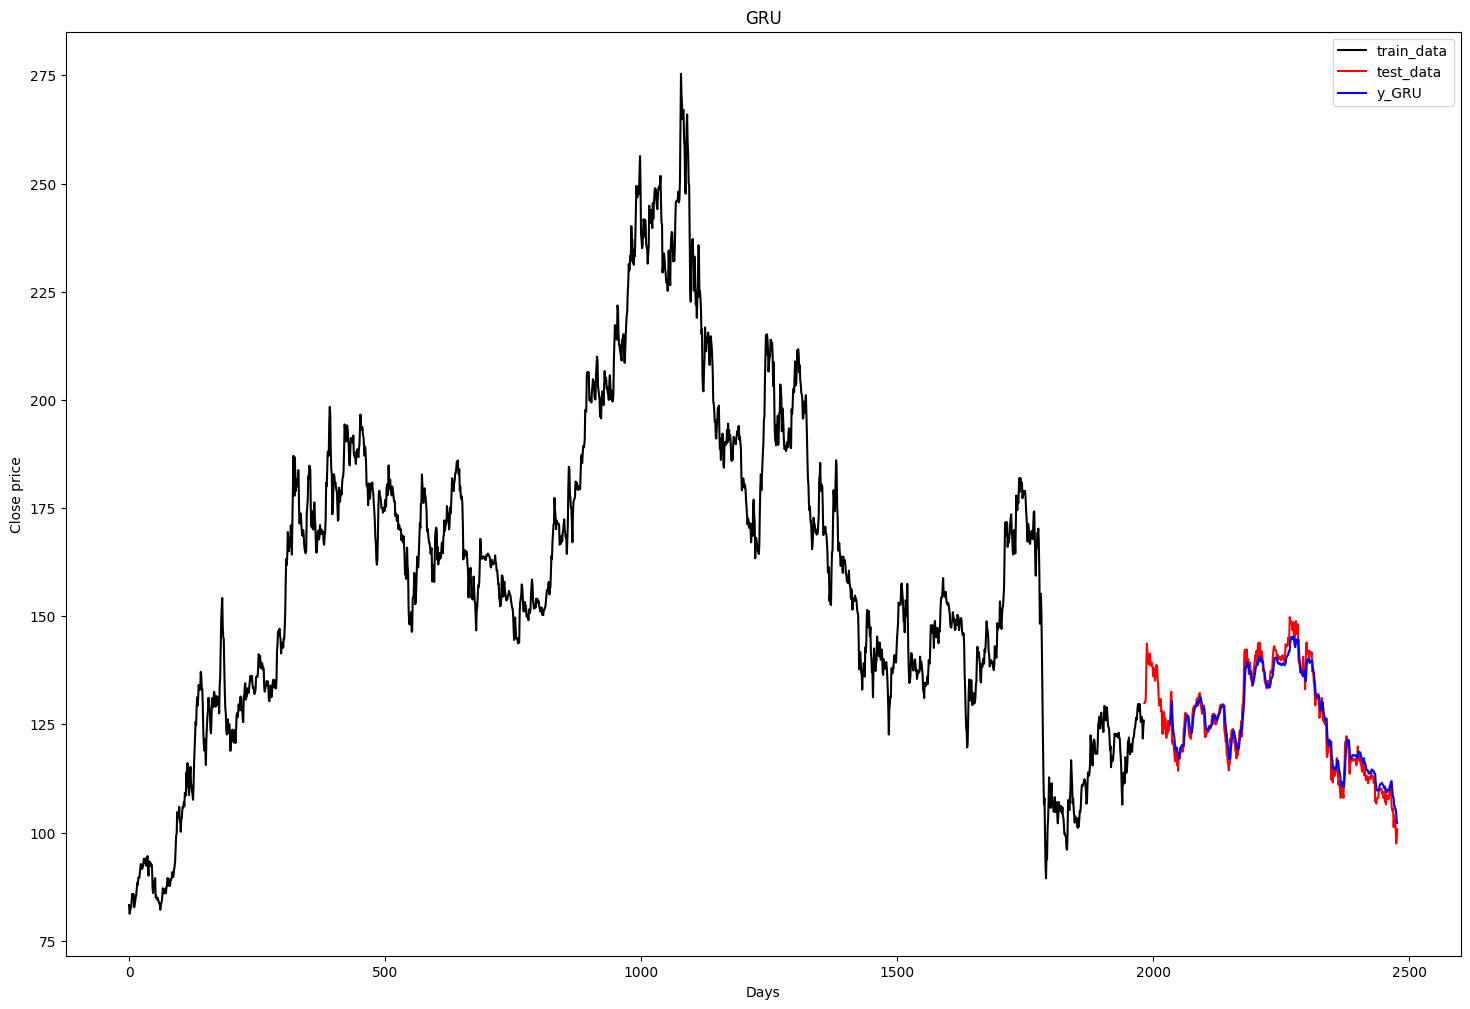

In [ ]:
fig, ax = plt.subplots(figsize=(18, 12))

# Plot for GRU predictions
ax.plot(train_data.index, train_data.Close, label="train_data", color="black")
ax.plot(test_data.index, test_data.Close, label="test_data", color="red")
ax.plot(test_data.index[50:], y_GRU_O, label="y_GRU", color="blue")
ax.legend()
ax.title.set_text("GRU")

plt.xlabel("Days")
plt.ylabel("Close price")

plt.show()

# **Evaluation**

In [ ]:
# calculate mean squared error
mse = mean_squared_error(y_test_O, y_GRU_O)
print('Mean Squared Error (MSE):', mse)

# calculate mean absolute error
mae = metrics.mean_absolute_error(y_test_O, y_GRU_O)
print('Mean Absolute Error (MAE):', mae)

# calculate root mean squared error
rmse = math.sqrt(mse)
print('Root Mean Squared Error (RMSE):', rmse)

Mean Squared Error (MSE): 6.654207310221241
Mean Absolute Error (MAE): 2.0065306225037305
Root Mean Squared Error (RMSE): 2.5795750251196883
